<a href="https://colab.research.google.com/github/kashish45/NeuralNetworks/blob/main/NN_Notes_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Content**

- 24Seven Business Case
- Exploding Gradients
- Exponentially Moving Avg
- GD with momentum
- RMSprop


#**Business Case**

You are working at **24Seven**, which has different stores buying various products. Based on the purchase history :
- you want to divide the stores into classes for better inventory management and customer handling.



Lets now load the data


In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
#https://drive.google.com/file/d/1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 19.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **Region** | Region of the store (1: Less purchase 2: frequent purchase 3: high purchase|
|02| **Fresh** | How many fresh items are brought |
|03|**Milk**| How many units of Milk is purchased |
|04|**Grocery**|Units of Grocery bought for the store |
|05|**Frozen**|Frozen items purchased |
|06|**Detergents_Paper**|Unit of Detergents and paper bought |
|07|**Delicassen**|Food related items |
|08|**class**| Type/Category of the Store (1 ,2 , 3)|


In [ ]:
df = pd.read_csv('multiclass.csv')

df.head()

Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1

Total Number of samples and features of the data:
<center>

| Records | Features |
| :-- | :-- |
| 440 | 8 |

In [ ]:
df.shape

(440, 8)

#EDA



Converting ```Region``` a **Categorical data** to  ```One Hot Encoding``` matrix



In [ ]:
df = pd.get_dummies(df, columns = ['Region'])

#storing class label
Y = df['class']
df = pd.get_dummies(df, columns = ['class'])

df.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Region_1  \
0  12669  9656     7561     214              2674        1338         0   
1   7057  9810     9568    1762              3293        1776         0   
2   6353  8808     7684    2405              3516        7844         0   
3  13265  1196     4221    6404               507        1788         0   
4  22615  5410     7198    3915              1777        5185         0   

   Region_2  Region_3  class_1  class_2  class_3  
0         0         1        0        1        0  
1         0         1        0        1        0  
2         0         1        0        1        0  
3         0         1        1        0        0  
4         0         1        1        0        0

In [ ]:
X = df.drop(columns=['class_1','class_2','class_3'])
y = df[['class_1','class_2','class_3']]

Visualizing the data using PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reducing features to just 2 features
pca = PCA(n_components=2)
visual_1 = pca.fit_transform(X)
visual_1.shape

(440, 2)

[0.45961362 0.40517227]


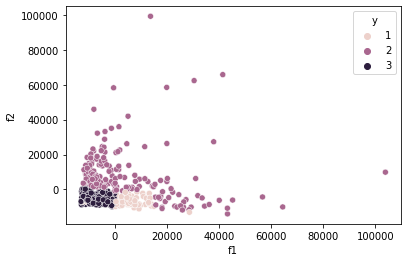

In [ ]:
df2 = pd.DataFrame(visual_1, columns=['f1', 'f2'])
df2['y'] = Y
print(pca.explained_variance_ratio_)
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

**Observe**

The data is non-linear, hence to correctly classify the data:
- We will require a deep Neural Network


# Random Weight Initialization

#### Question: In previous lectures, Why did we initialize weights randomly? Why can't we initialize weights as 0 or same number ?

<center>  <img src='https://drive.google.com/uc?id=1V8lSjPWegfTrTzfEHa5DtX0rLV4Mhdz3' width=700> </center>



Recall that the derivative of ReLU

- Derivative of ReLu wrt z: $ReLu'(z) = \left\{\begin{matrix}
1, if \ z>0\\
0, if \ z<0
\end{matrix}\right.$

Now, if all the weights are intialized with same number
$ $
#### Case 1: w = 0 and b = 0
- if we find the derivative of weights w.r.t Loss,
    - $z = w^T.x$ will be become 0
    - As z = 0, all derivative of ReLU will become 0
    - and the network won't update.

This is called as dead neuron concept.





#### Case 2: all w's = 0 but bias is non zero +ve num

In that case, the derivatives will be 1.


- Each weight will be updated with same reduction (minus learning rate * 1 (derivative of ReLu))

- Hence, all weights will become same.
    - and n/w won't learn anything

 <center> <img src='https://drive.google.com/uc?id=1QnCUxJg3PuV09ulK7HQQLcZ7DbTE3lfl' width=700> </center>




### Case 3: All w's are same non zero (say  1)

In this case, all the weights of the layer will become equal and hence representing a single neuron.

Hence, the network won't learn anything even if we increase neuron in the layer.

<center>  <img src='https://drive.google.com/uc?id=1FA2IFLw8zJ2ICER7pkEseg_8kgbRhVVf' width=700> </center>


### Question: How to break this Symmetry?

Ans: By initalizing weights randomly

# Exploding Gradients

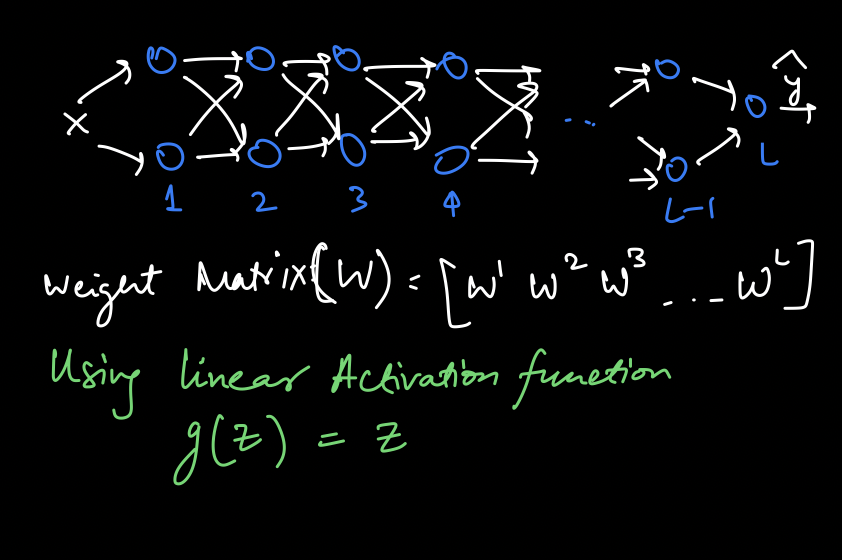

#### What do we mean by a deep Neural Network ?
Ans: The Model will have a large number of hidden layers

<br>

Suppose we have a Neural Network which is L layer deep and has bias for any layer as zero ($b^k = 0$),
- Then the weight of the model becomes: $W = [W^1,W^2,W^3...W^k, .., W^L ]$

Lets define an activation $g()$ such that:
- $g(z^k) = z^k = W^{k-1} \times a^{k-1}$

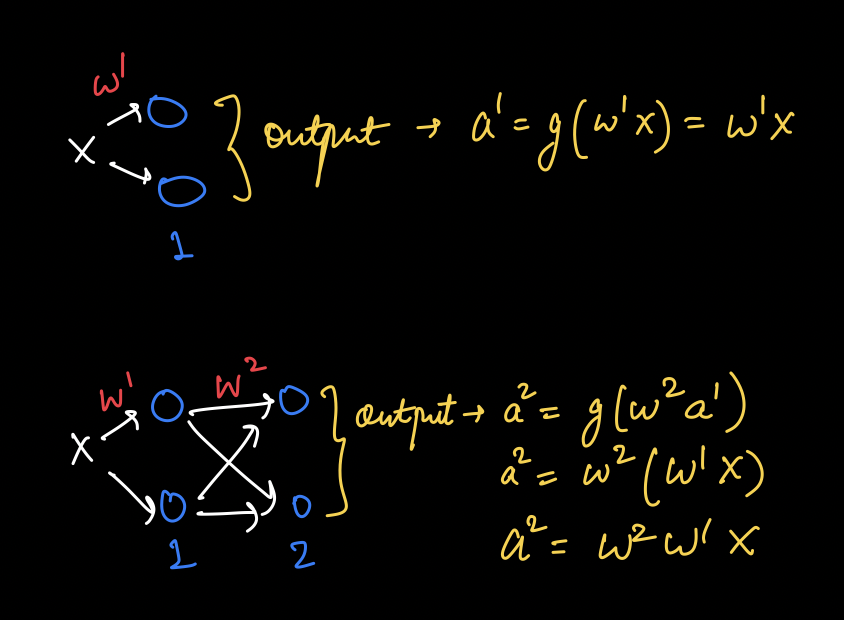


#### What will be the output for layer2 ($a^2$) ?
Ans: As $g(z^k) = z^k$, output for layer1 ($a^1$) will be:
- $a^1 = g(z^1) = z^1 = W^1 \times X $; where $X$ is the input feature

Similarly:
- $a^2 = g(z^2) = z^2 = W^2 \times a^1 = W^2 \times W^1 X$







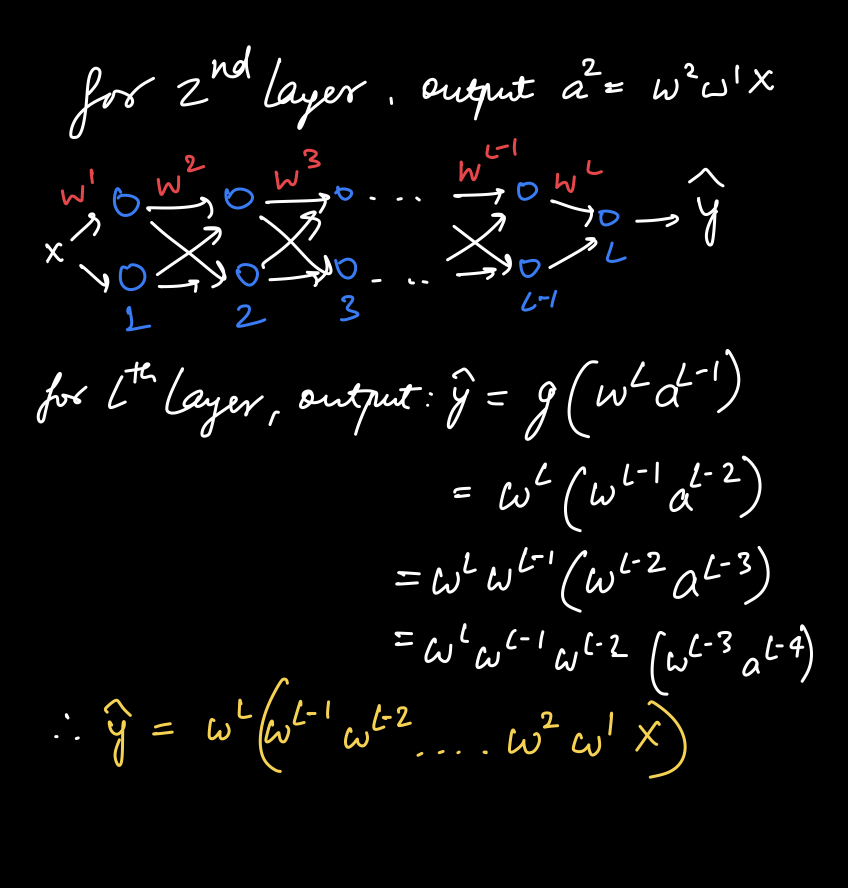

#### Then, what will be the final prediction of the model ($\hat{y}$) ?
Ans: $\hat{y} = W^L \times  (W^{L-1}... W^2 W^1X) $

<br>

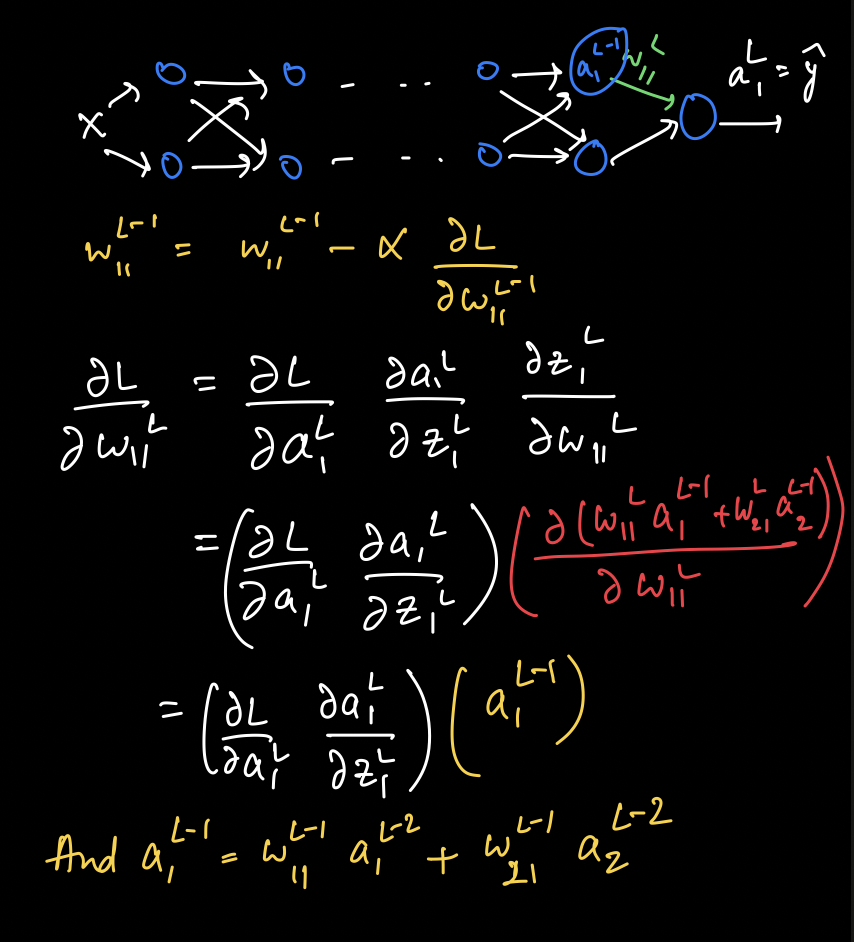

#### What will the weight updation of $w^L_{11}$ ?
Ans: $w^L_{11} = w^L_{11} - α \times\frac{\partial Loss}{\partial w^L_{11}}$

<br>

#### what will be the value of Gradient $\frac{\partial Loss}{\partial w^L_{11}}$ ?

Ans: Using Backpropagation,
-  $\frac{\partial Loss}{\partial w^L_{11}} = \frac{∂loss}{∂ a^L_1} \times \frac{∂a^L_1}{∂ z^L_1 } \times \frac{∂z^L_1}{∂ w^L_{11}}$

if we look only at $\frac{∂z^L_1}{∂ w^L_{11}}$
- $\frac{∂z^L_1}{∂ w^L_{11}} = \frac{∂ [ w^L_{11} \times a^{L-1}_{1} + w^L_{21} \times a^{L-1}_{2} ] }{∂ w^L_{11}}$

On solving
-   $\frac{∂z^L_1}{∂ w^L_{11}} = a^{L-1}_{1} $

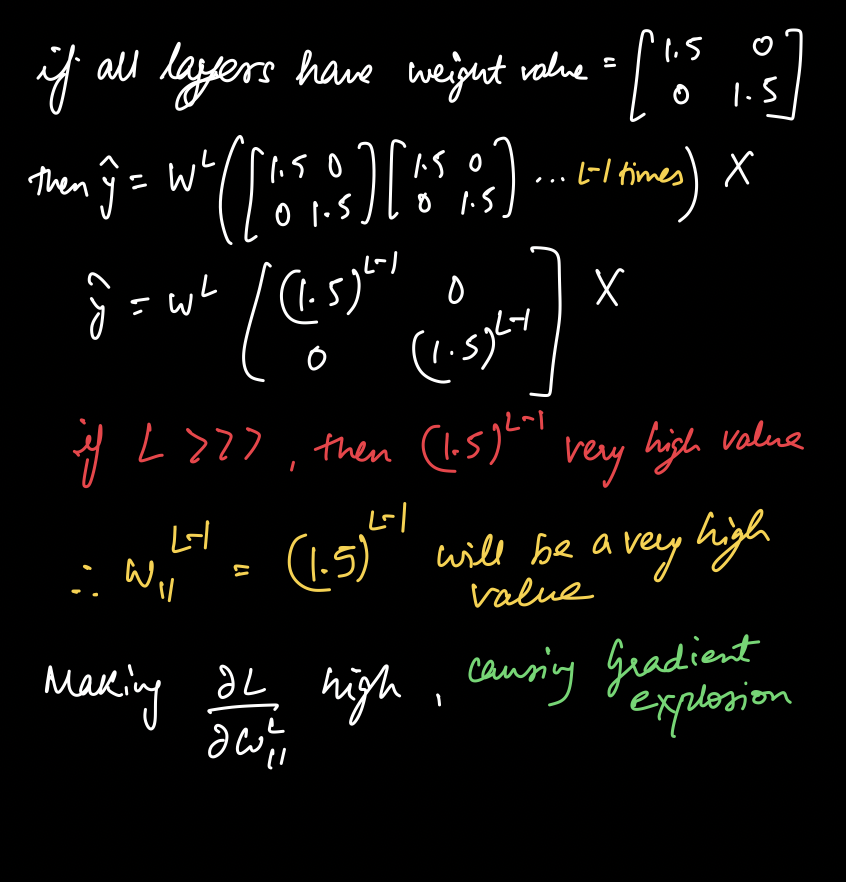

#### Now lets say for all the layers $W = [[1.5, 0],[0, 1.5]]$ except the last layer and $b = 0$, then what will be $\hat{y}$ ?

Ans: $\hat{y} = W^L [[1.5,0],[0,1.5]]^{L-1} X$

<br>


#### What will be the value of $W^{L-1}_{11} $ ?

Ans: $W^{L-1}_{11} = (1.5)^{L-1} $
<br>

#### What if the value of L becomes very large ?

Ans: The value $1.5^L$ increases exponentially,
- causing the value of $W^{L-1}_{11}$ to be very high

Which in turn makes
- value of $a^{L-1}_{1}$ very high


Thus causing $\frac{∂z^L_1}{∂ w^L_{11}}$ to be high value
- And making gradient $\frac{\partial Loss}{\partial w^L_{11}}$ explode


<br>

#### How does exponential growth pose a problem ?
Ans: When the model backpropagates,
- The gradients become so large that it cannot be stored in computer memory
- Which in turn makes the weight updation not possible

**Note:** This exponential growth is also called Exploding gradients









#Weight Intialization

#### Question: Will initializing weights randomly will solve exploding/vanishing gradient problem ?

Ans:

No. It is possible that weights initialized randomly can be very large value or small value.
- Both of these can cause graidents to explode or vanish

#### How to avoid exploding Gradients in a deep NN ?


Ans:  there are two major approaches:

- Using ReLU as activation function

- Or Using Weight intialization approaches :



#### Weight initialization from a distribution

Instead of initializing weights randomly,
- we need a control over its variance (i.e. avoid large and very small weights)

<br>

In order to do that, we can initialize weights from a distribution.

We could either use **Normal Distribution** with small $\sigma$ or **uniform distribution** between $-1$ and $1$.


<center>  <img src='https://drive.google.com/uc?id=1MOSnqCGT8cXjAT39MNn4YgPeE3zMoUFm' width=800></center>


#### Are there any other strategies ?

Suppose there's a neuron in a deep NN network


<center>  <img src='https://drive.google.com/uc?id=1MRfyVtD7zeCyiP23M7zZy6pWo2knF8tv' width=800></center>





Now, notice that
- as the number of outputs from previous layer increases,
- we would want our weight values to be smaller.




**Why?**
- Recall that the derivative that we calc. came out to be
$$\frac{∂z^L_1}{∂ w^L_{11}} = a^{L-1}_{1} $$

Now, if activation is linear, then
- output = input i.e. $Z^{L-1}$
- and Z is a function of weights.

So, if weights are large
- then we'll run into problem of exploding gradient






So, we want our weights to depend on the output of previous layer

#### How can we make our weight init strategy based on incoming connections ?

Recall that
- initializing weights from distribution meant
- controlling the variance

So, let's initialize weights from distribution whose variance is

$$var(W) = \frac{1}{n}$$
- where n is the number of conn. from previous layer

So, we can have a Normal distribution with variance = $\frac{1}{n}$

On similar note, there are some other initialization strategies.

But, before that, let's learn some terms

#### Fan in fan out

<center>  <img src='https://drive.google.com/uc?id=1uP5u_7BXgD6TH-vybVDiQb7BWWyxoQHN' width=800></center>

Imagine we have a neuron with 4 inputs and 2 outputs.

Then
- $fan-in \to 4$ and
- $fan-out \to 2$.



#### Weight init strategies

- There are other strategies that have worked experimentaly but have weak theory supporting it.
- Some of these techniques are Xavier Glorot, He.


<center>  <img src='https://drive.google.com/uc?id=19-jyJd_y34mHbwNT_vJ3p8elH7O-qvGl' width=800> </center>

Weights could be initialized using uniform distribution as follows:
$$w^k_{ij} \sim Uniform\bigg[ \frac{-1}{\sqrt{fan_{in}}}, \frac{1}{\sqrt{fan_{out}}}\bigg]$$  
- These techniques were used around early $2010's$.


<center>  <img src='https://drive.google.com/uc?id=1IR1CIZB68-WPAX_5l6aadn2jTao2mQbG' width=800></center>

#### Glorot init

Glorot initialization states that we could initialization weights using either of following approaches:
- Glorot Normal
- Glorot Uniform


Used with **tanh activation**

$ $
- Normal Distribution:
     $$w^k_{ij} \sim N(0,\sigma_{ij}),\space where \space \sigma_{ij} = \sqrt\frac{2}{fan_{in}+fan_{out}}$$

- Uniform Distribution:
     $$w^k_{ij} \sim Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fan_{in}+fan_{out}}}, \frac{\sqrt{6}}{\sqrt{fan_{in}+fan_{out}}}\bigg]$$


 <center> <img src='https://drive.google.com/uc?id=13EGBQPBRbbc_WafqmvOqS5x_4JkH8nm9' width=800> <center>



#### He init

He initialization was designed around $2015$. The formula is as follows:
  
- Normal Distribution: $N(0,\sigma)$, where $\sigma = \sqrt\frac{2}{fanin}$
- Uniform Distribution: Uniform$\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin}}, \frac{\sqrt{6}}{\sqrt{fanin}}\bigg]$


used with **ReLU activation**


<center><img src='https://drive.google.com/uc?id=1Ozm8i15zpHaTuUNjJ1VRINeUsjA1GEvh' width=800></center>

#### Summarize

1. **Glorot init**
 - Glorot Normal : $w^k_{ij} \sim N(0,\sigma_{ij})$, where $\sigma_{ij} = \sqrt\frac{2}{fanin+fanout}$

<br>

 -  Glorot Uniform: $w^k_{ij} \sim Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin+fanout}}, \frac{\sqrt{6}}{\sqrt{fanin+fanout}}\bigg]$

<br>

2. **He init**
 - Normal Distribution: $N(0,\sigma)$, where $\sigma = \sqrt\frac{2}{fanin}$

 <br>

 - Uniform Distribution: $Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin}}, \frac{\sqrt{6}}{\sqrt{fanin}}\bigg]$


Lets Implement Glorot Uniform weight intilization method

Splitting Data into Train, Validation and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


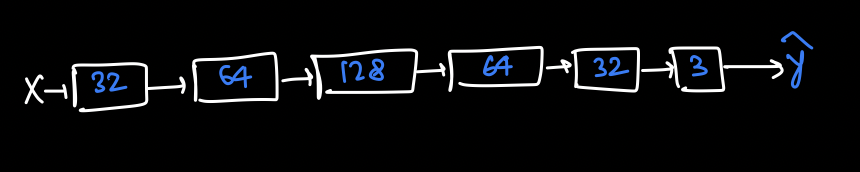

Now that the data is ready, we can implement
- A NN model using [tensorflow keras](https://keras.io/api/)
- By creating 7 layered NN such that:

|Layer| |Descrption|
|:--| |:--|
|**L1**| |Is the Input Layer |
|**L2**| |Contains 32 Neurons|
|**L3**| |Contains 64 Neurons|
|**L4**| |Contains 128 Neurons|
|**L5**| |Contains 64 Neurons |
|**L6**| |Contains 32 Neurons|
|**L7**| |Is the Output Layer |
<br>

**Note:** In Between the layers, we will use:
- ReLU as the Activation function


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_baseline():

  model = Sequential([
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(128, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(3,activation='softmax')])
  return model

In [ ]:
model = create_baseline()

Using ```MiniBatch GD``` as Optimizer

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch=10 and batch size = 128

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128)


Epoch 1/10
3/3 [==============================] - 2s 91ms/step - loss: 1.1166 - val_loss: 1.1014
Epoch 2/10
3/3 [==============================] - 0s 11ms/step - loss: 1.1109 - val_loss: 1.0949
Epoch 3/10
3/3 [==============================] - 0s 11ms/step - loss: 1.1055 - val_loss: 1.0883
Epoch 4/10
3/3 [==============================] - 0s 12ms/step - loss: 1.1004 - val_loss: 1.0820
Epoch 5/10
3/3 [==============================] - 0s 12ms/step - loss: 1.0955 - val_loss: 1.0762
Epoch 6/10
3/3 [==============================] - 0s 11ms/step - loss: 1.0910 - val_loss: 1.0706
Epoch 7/10
3/3 [==============================] - 0s 10ms/step - loss: 1.0865 - val_loss: 1.0650
Epoch 8/10
3/3 [==============================] - 0s 12ms/step - loss: 1.0822 - val_loss: 1.0598
Epoch 9/10
3/3 [==============================] - 0s 11ms/step - loss: 1.0780 - val_loss: 1.0547
Epoch 10/10
3/3 [==============================] - 0s 11ms/step - loss: 1.0739 - val_loss: 1.0497


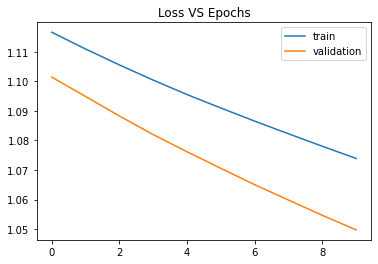

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**Observe**

After 10 epochs the model still has a very high loss

<br>

#### What should be done to make the model perform better ?

Ans: increase the training epochs of the model

Lets now increase the epoch of model to 200

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=200, batch_size=128, verbose = 0)


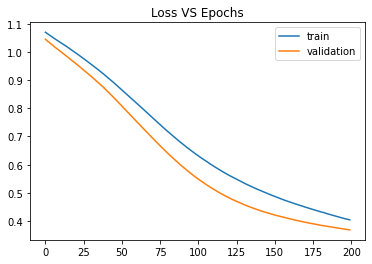

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**observe**

The model requires 210 epochs:
- For it to have such a low loss

Now imagine if the dataset has 5 million samples:
- The model will require a very high training epoch
- in order for it to reach global minima

This surely will be a huge drawback:
- While deploying the model

# Exponential Moving Average

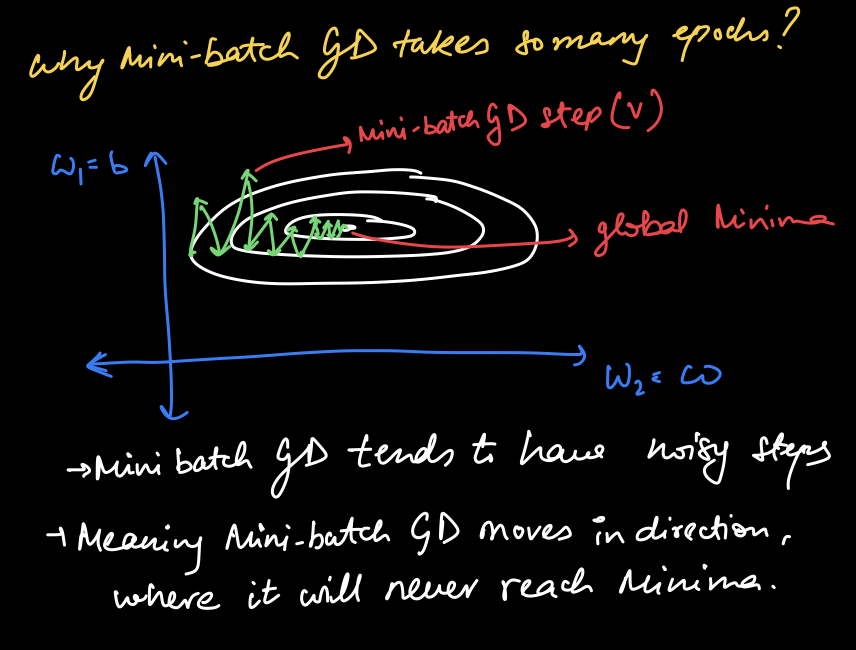

#### Why Mini-Batch GD takes so many epochs ?
Ans: Mini-batch GD takes some steps ($V$) before reaching global minima

In many of these steps, the optimizer
- Tends to move in direction where it will never reach minima
- Hence due to all these noisy steps, the GD takes so many epochs

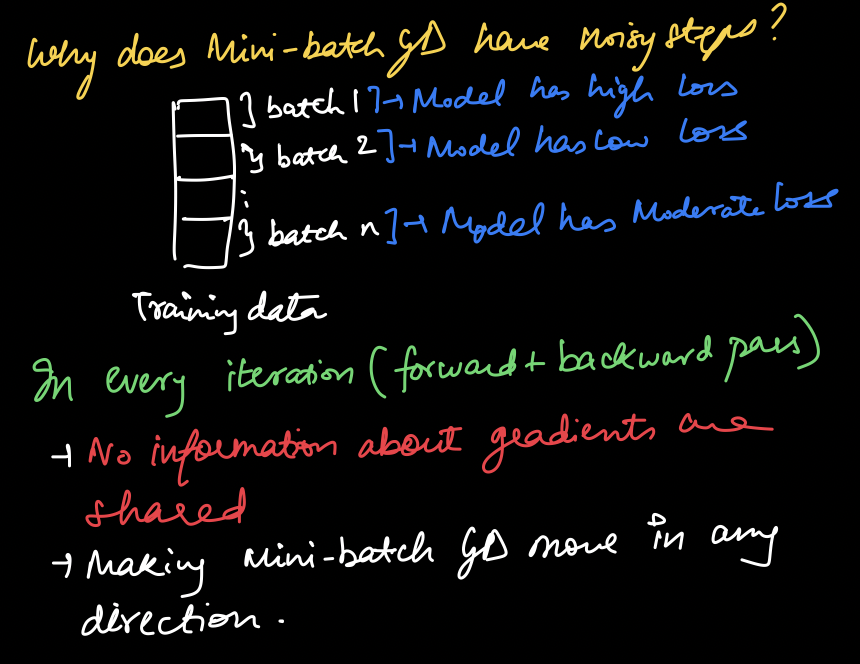

#### Why does mini-Batch GD have noisy steps ?
Ans: Because, training data is divided into batches
- And for some batch the model has very small loss
- while for a few batch, the loss is quite high
- Making the gradients of weights have high, low values
- Thus effecting the step of Mini-Batch GD optimizer

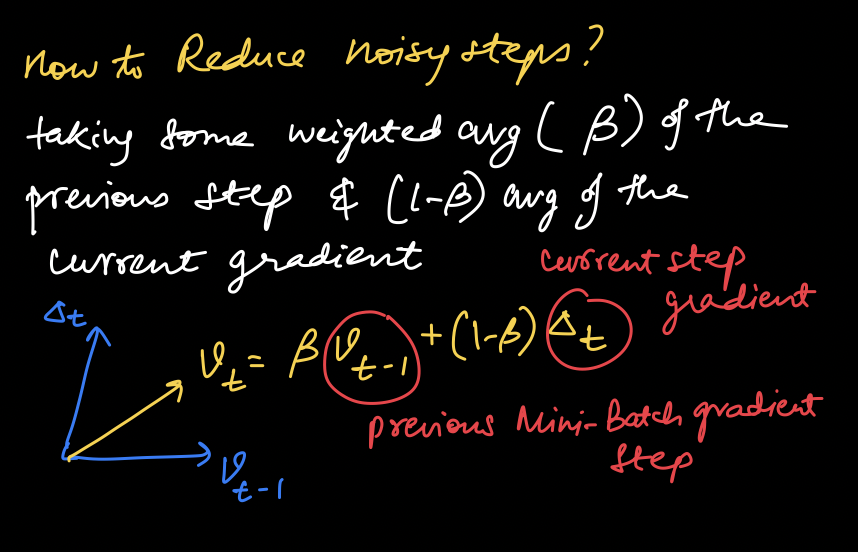



#### How to reduce the number of epochs during training of the model ?

Ans: By decreasing the number of steps ($V$) optimization algorithm takes to reach global minima.

<br>

#### How to reduce the steps $V$ required for the algorithm to reach global minima ?

If we combine these past steps taken by the optimizer:
-  for it to update the direction of step
- such that it moves towards global minima  





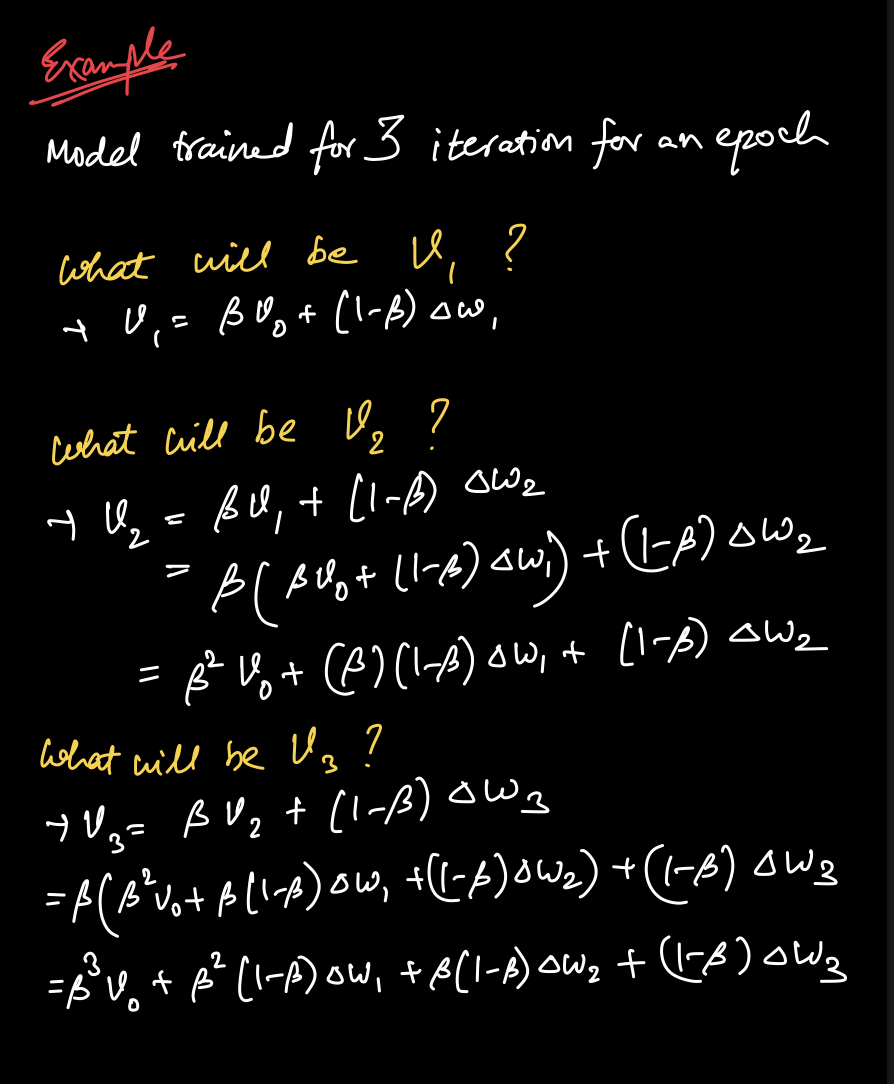

#### Will combining the past steps taken by the optimizer help ?
Ans: Yes, to better understand this lets assume model trained for 3 iterations

Note: 1 iteration = ForwardProp + BackProp

#### What will be the value of $V_1$ ?
Ans: $V_1 = \beta V_0 + (1-\beta) Δ w_1$



#### What will be the value of $V_2$ ?
Ans: $V_2 = \beta V_1 + (1-\beta) Δ w_2$

- $V_2 =\beta^2 V_0 + \beta(1-\beta)Δ w_1+ (1-\beta) Δ w_2 $


#### What will be value of $V_3$ ?

Ans: $V_3 = \beta V_2 + (1-\beta) Δ w_3$

- $V_3 =\beta^3 V_0 + \beta^2(1-\beta)Δ w_1+ \beta(1-\beta) Δ w_2 + (1-\beta) Δ w_3  $




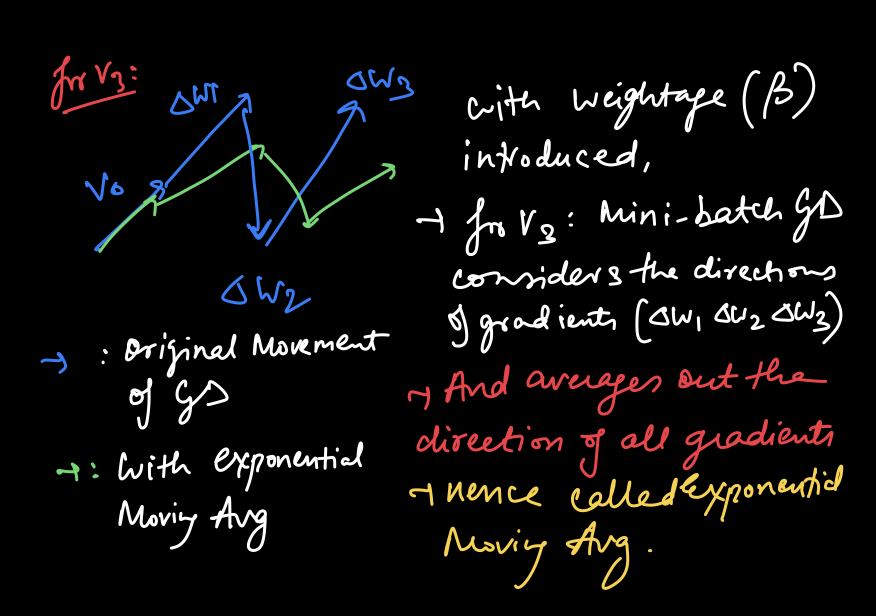


Thus using **Exponential Moving Average**, the optimizer
- updates its direction according to its previous step taken.
- And smoothes out its current direction
- in order to reach global minima faster

#Graident Descent with Momentum

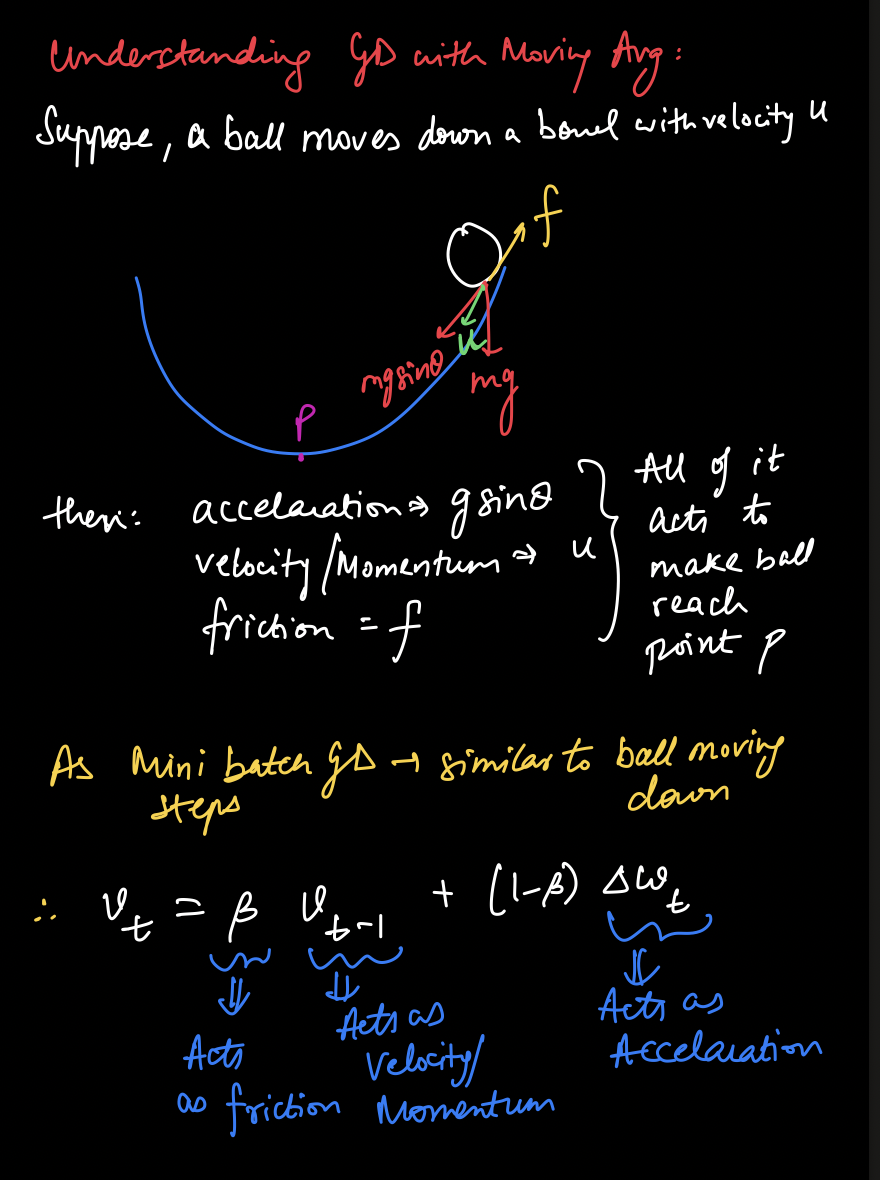

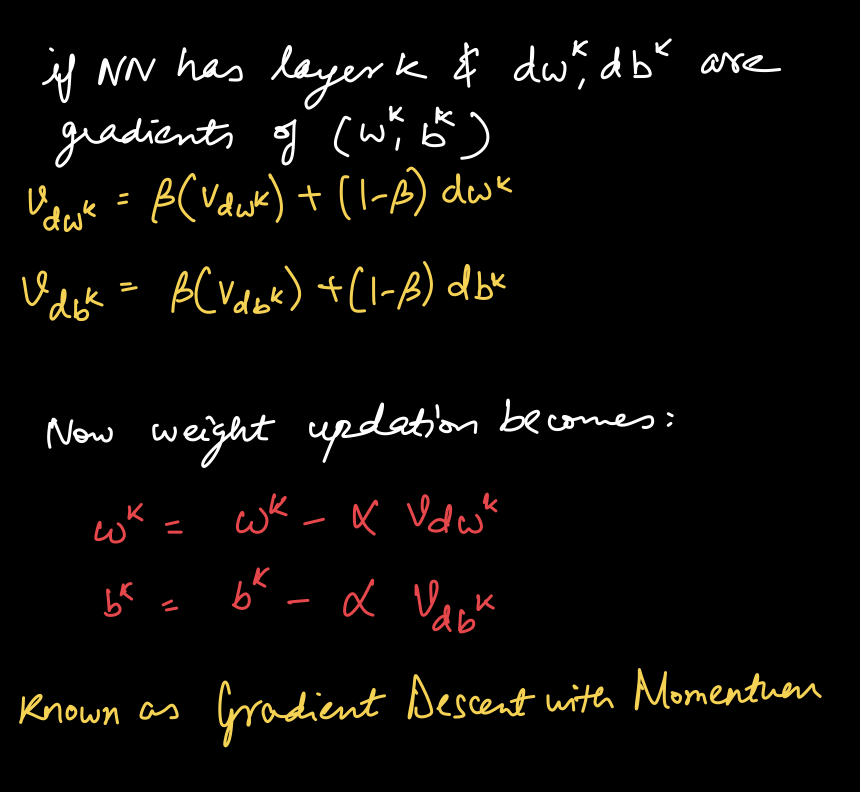

#### How does Gradient Descent implement Exponential Moving Average ?

Ans: for some iteration t and layer $k$ of the NN :
- after finding $dw^k$ and $db^k$,

the exopnential moving average is introduced:
- $V_{dw^k} = β \times V_{dw^k} + (1-β) \times dw^k $

Similarly:

- $V_{db^k} = β \times V_{db^k} + (1-β) \times db^k $

Hence Weight updation with learning rate $α$ becomes:
- $w^k = w^k -\alpha \times V_{dw^k}$

- $b^k = b^k -\alpha \times V_{db^k}$

<br>

**Note:** This approach can be analogous to a ball moving down a hill where:

- the gradients $dw^k $ and $db^k$ acts as acceleration
- the $V_{dw}$ and $V_{db}$ acts as velocity with which the ball is moving
- And the term $β$ acts as friction and helps prevent the ball from speeding up without limit

Hence we can say, as the ball rolls down, it gains **momentum**
- therefore this approach is called **Gradient Descent with Momentum**












Lets now implement Gradient Descent with momentum on our model

In [ ]:
model_gdm = create_baseline()

Using ```MiniBatch GD``` as Optimizer

In [ ]:
model_gdm.compile(optimizer = tf.keras.optimizers.SGD(momentum=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_gdm.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


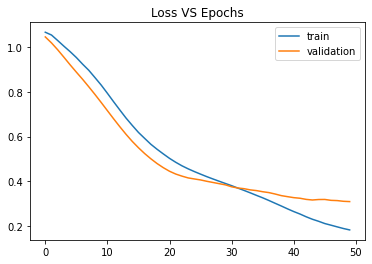

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**Observe**

Just by using Momentum with Gradient Descent:
- The model was able to perform so much better in just 25 epochs



# RMSprop

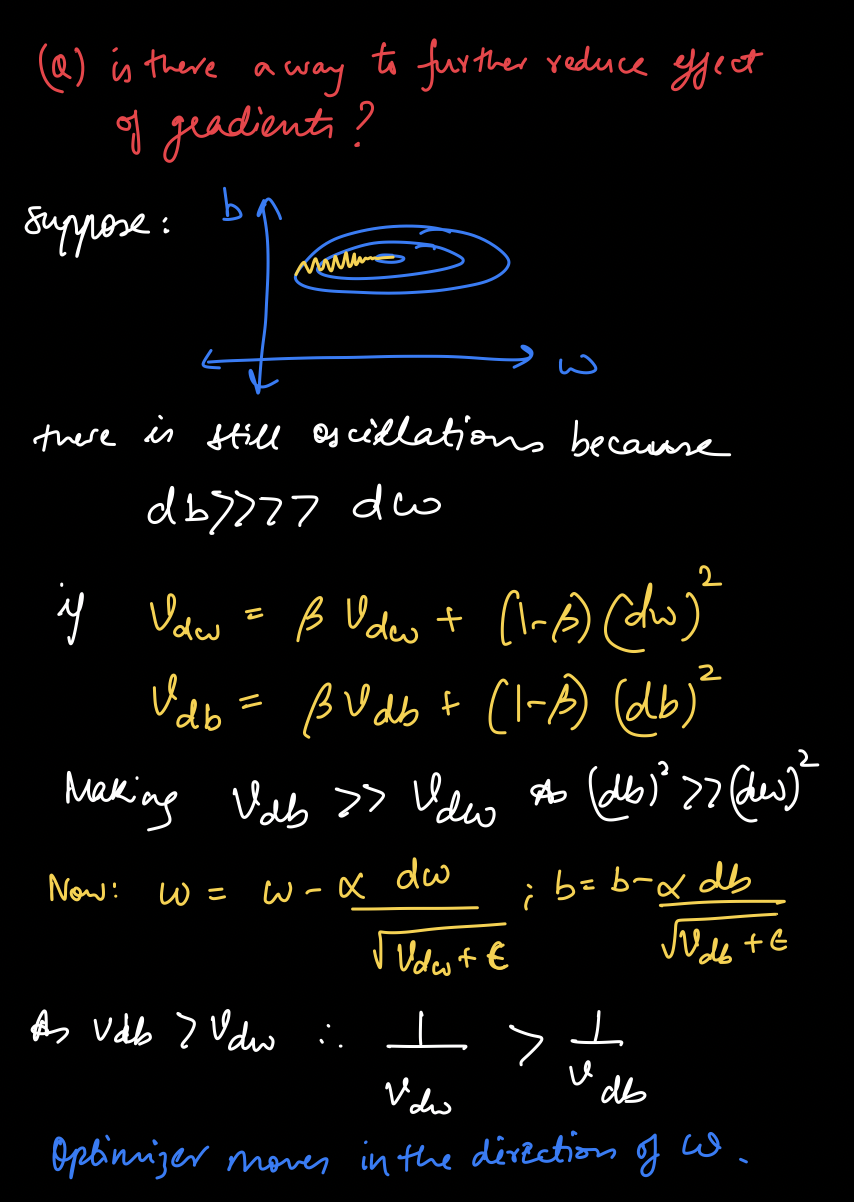

This 25 epochs is still quite high for a real world training data

#### Is there a way to furthur reduce the training epoch for the model ?

Ans: Yes, as we know :
- optimizer tends to move in direction (osciallations) when gradient of weight is greater than the other
- Meaning $ Δb >>> Δw $

Hence to reduce this moving direction, lets say:

On some iteration t, we calculate $V_{dw} $ by squaring the gradients as:
- $V_{dw^k} = \beta V_{dw^k} + (1-β) (dw^k)^2 $
- $V_{db^k} = \beta V_{db^k} + (1-β) (db^k)^2 $


#### How is squaring useful ?
Ans: as gradients in which the optimizer moves is higher then:
- the square of the gradient will be much high
- thus making $V_{db^k} > V_{dw^k}$

<br>

Now during weight updation:

- $w^k = w^k - α \times \frac{dw^k}{\sqrt{V_{dw^k}+ ϵ} } $; where $ϵ$ is a very small value  $ = 10^{-8}$
- $b^k = b^k - α \times \frac{db^k}{\sqrt{V_{db^k}+ ϵ} } $

<br>

Since $V_{db^k} > V_{dw^k}$,
- meaning $\frac{1}{V_{dw^k}} > \frac{1}{V_{db^k}} $

Thus making the  optimizer to move more in the direction of $dw^k$:
- hence decreasing  osciallations of the optimizer

<br>

#### Why is epilson $ϵ$ added ?
Ans: To prevent the denominator to become 0:
- When $V_{dw}$ or $V_{db}$ is 0

<br>

**Note:** This approach is known as **RMSprop**





Implementing RMSProp

In [ ]:
model_rms = create_baseline()

Using ```RMSprop``` as Optimizer

In [ ]:
model_rms.compile(optimizer = tf.keras.optimizers.RMSprop(rho=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_rms.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


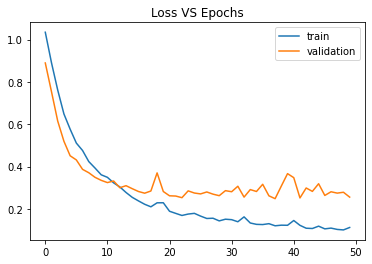

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**Observe**

Though RMSProp reaches minima within 10 training epochs:
- we see a lot of oscillations than Gradient Descent with momentum
- meaning the optimizer still takes steps in the direction not to the global minima
